<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)

Drawing conclusions based on probability in the face of randomness



Is the sample reflective of our concept of the population?

(20, 1)


,coinflips
0,0
1,1
2,0
3,0
4,0


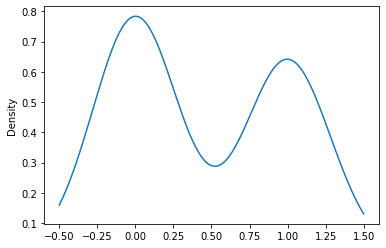

In [6]:
# Coinflips example - What is the population?
import numpy as np

coinflips = np.random.binomial(n=1, p=.5, size=20)

df = pd.DataFrame({'coinflips': coinflips})

df['coinflips'].plot.density();

print(df.shape)
df.head()

If we repeat the sampling why does our estimate of the mean move around so much? 

In [10]:
# Coinflips example - See the implications of randomness

coinflips = np.random.binomial(n=1, p=.5, size=10)

sample_mean = np.mean(coinflips)

sample_mean

0.7

What happens as I increase the sample size? The sample mean deviates less from the...?

In [13]:
# More Information -> Greater Confidence in the face of randomness

coinflips = np.random.binomial(n=1, p=.5, size=100)

sample_mean = np.mean(coinflips)

sample_mean

0.53

In [14]:
coinflips = np.random.binomial(n=1, p=.5, size=10000)

sample_mean = np.mean(coinflips)

sample_mean

0.504

![Standard Error of the Sample  Mean](https://jungminded.weebly.com/uploads/1/3/5/8/13582285/7285766_orig.jpeg?160)

**Conclusion: As our sample size goes up, our estimates (of the mean in this case) get more precise, allowing us to infer things about the population with greater confidence.**



## One Sample T-test

What if I didn't have a fair coin?

Comparing information from a sample against our concept of the population.

![One Sample T Statistic](https://lh3.googleusercontent.com/proxy/CXO8J4hOx3DqUt-vfRfmKN-B9IL0wNZlnbQ6lXnopiAAGQWtLIY-f4qD_2zCX_C3p_aaqi9-Qni2MqUD8mVbnnXWEy-AtAywlEp7bUZuMWIZwmvbFJFhdeHcUY5v-i3vcdg5cL9jdh6votwdHnFd44uE)

In [15]:
# Is this a fair coin or not?
coinflips = np.random.binomial(n=1, p=.6, size=10)

coinflips

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

## The T-test Process:

In [0]:
from scipy import stats

In [17]:
# Lets use a tool called a t-test to test if this is a fair coin or not
# Parameters: Sample, Null Hypothesis Value (Our concept of the population)
stats.ttest_1samp(coinflips, 0.5)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [21]:
stats.ttest_1samp(np.random.binomial(n=1, p=.6, size=100), 0.5)

Ttest_1sampResult(statistic=2.0310096011589898, pvalue=0.04493472521263044)

## Two Sample T-test

Comparing two groups or samples against each other rather than a single sample against a population. 



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



In [0]:
# Generate a fake dataset

xbar1 = 180
s1 = 5

xbar2 = 178.5
s2 = 4.25

sample1 = np.random.normal(xbar1, s1, 1000)
sample2 = np.random.normal(xbar2, s2, 800)

In [25]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=6.5811598908039155, pvalue=6.105655800965294e-11)

## Lets Practice more 1-sample and 2-sample T-tests

Using the dataset that you will be using on your assignment

In [26]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-24 19:49:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-24 19:49:07 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [29]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

print(df.shape)
house.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [31]:
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']

In [33]:
stats.ttest_1samp(dem['handicapped-infants'], .65, nan_policy='omit')

Ttest_1sampResult(statistic=-1.486928338001851, pvalue=0.1382595387620768)

In [0]:
rep = df[df['party'] == 'republican']

In [36]:
stats.ttest_ind(dem['handicapped-infants'], rep['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means